## Demo

In [1]:
%matplotlib inline
import os
import torch

from Model import Transformer
from Translator import Translator

Load transformer model.

In [2]:
model = Transformer(bpe_size=32000, h=8, d_model=512, p=0.1, d_ff=1024).cuda()
if not os.path.exists("epoch60_acc_58.90_ppl_10.85.pt"):
    os.system("wget https://s3.amazonaws.com/transformer-py/epoch60_acc_58.90_ppl_10.85.pt")
model.load_state_dict(torch.load("epoch60_acc_58.90_ppl_10.85.pt")["model"])

Load bytes pair encoding model

In [3]:
if not os.path.exists("en-de_bp3_32000.model"):
    os.system("wget https://s3.amazonaws.com/transformer-py/en-de_bp3_32000.model")
translator = Translator(model, "en-de_bp3_32000.model")

Translate one example from EN to DE.

In [4]:
target, attn = translator.translate("Every 10 minutes, bitcoin mining machines solve math problems that create 12.5 new bitcoin.")

In [5]:
print(target)

Jede zehn Minuten, Bitcoinbergbaumaschinen lösen Mathematikprobleme, die 12,5 neue Bitcoin erzeugen.


Examine multi-head attention heapmap (average of all 8 heads).

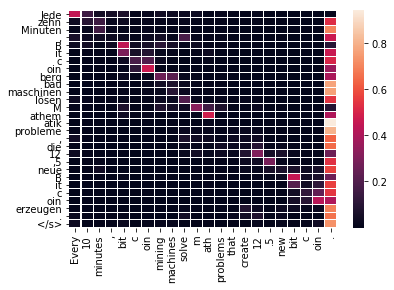

In [6]:
translator.attention_heatmap(attn)